# ezlocalai Tests and Examples

Simply choose your favorite model of choice from the models list and paste it into the `model` variable on the API calls. You can get a list of models below.

Install OpenAI and requests:

```bash
pip install openai requests python-dotenv
```

**Note, you do not need an OpenAI API Key, the API Key is your `EZLOCALAI_API_KEY` for the server if you defined one in your `.env` file.**

## Global definitions and helpers

Confirm that your `DEFAULT_MODEL` is set to the model you want to use in your `.env` file.


In [35]:
import openai
import requests
import time
import os
import re
from dotenv import load_dotenv

load_dotenv()

# Set your system message, max tokens, temperature, and top p here, or use the defaults.
SYSTEM_MESSAGE = "Act as a creative writer. All of your text responses are transcribed to audio and sent to the user. Be concise with all responses. After the request is fulfilled, end with </s>."
DEFAULT_MAX_TOKENS = 256
DEFAULT_TEMPERATURE = 1.33
DEFAULT_TOP_P = 0.95


# ------------------- DO NOT EDIT BELOW THIS LINE IN THIS CELL ------------------- #
EZLOCALAI_SERVER = os.getenv("EZLOCALAI_SERVER", "http://localhost:8091")
EZLOCALAI_API_KEY = os.getenv("EZLOCALAI_API_KEY", "none")
DEFAULT_LLM = os.getenv("DEFAULT_LLM", "zephyr-7b-beta")
openai.base_url = f"{EZLOCALAI_SERVER}/v1/"
openai.api_key = EZLOCALAI_API_KEY if EZLOCALAI_API_KEY else EZLOCALAI_SERVER
HEADERS = {
    "Content-Type": "application/json",
    "Authorization": f"{EZLOCALAI_API_KEY}",
    "ngrok-skip-browser-warning": "true",
}


def display_content(content):
    global EZLOCALAI_SERVER
    global HEADERS
    outputs_url = f"{EZLOCALAI_SERVER}/outputs/"
    try:
        from IPython.display import Audio, display, Image, Video
    except:
        print(content)
        return
    if "http://localhost:8091/outputs/" in content:
        if outputs_url != "http://localhost:8091/outputs/":
            content = content.replace("http://localhost:8091/outputs/", outputs_url)
    if "<audio controls>" in content or " " not in content:
        import base64
        from datetime import datetime

        try:
            audio_response = content.split("data:audio/wav;base64,")[1].split('" type')[
                0
            ]
        except:
            audio_response = content
        file_name = f"outputs/{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.wav"
        with open(file_name, "wb") as fh:
            fh.write(base64.b64decode(audio_response))
        display(Audio(filename=file_name, autoplay=True))
    if outputs_url in content:
        urls = re.findall(f"{re.escape(outputs_url)}[^\"' ]+", content)
        for url in urls:
            file_name = url.split("/")[-1]
            url = f"{outputs_url}{file_name}"
            data = requests.get(url, headers=HEADERS).content
            if url.endswith(".jpg") or url.endswith(".png"):
                content = content.replace(url, "")
                display(Image(data=data))
            if url.endswith(".mp4"):
                content = content.replace(url, "")
                display(Video(data=data, autoplay=True))
            if url.endswith(".wav"):
                content = content.replace(url, "")
                print(f"URL: {url}")
                display(Audio(data=data, autoplay=True))
    print(content)

## Language Models

Get a list of models to choose from if you don't already know what model you want to use.


In [36]:
# Wait for server to come up instead of timing out.
while True:
    try:
        models = requests.get(f"{EZLOCALAI_SERVER}/v1/models", headers=HEADERS)
        if models.status_code == 200:
            break
    except:
        pass
    time.sleep(1)

print(models.json())

['bakllava-1-7b', 'llava-v1.5-7b', 'llava-v1.5-13b', 'yi-vl-6b', 'CapybaraHermes-2.5-Mistral-7B', 'CapybaraHermes-2.5-Mistral-7B', 'KafkaLM-70B-German-V0.1', 'CodeLlama-70B-Python', 'CodeLlama-70B-Instruct', 'CodeLlama-70B-hf', 'Tess-34B-v1.5b', 'Tess-10.7B-v1.5b', 'Goliath-longLORA-120b-rope8-32k-fp16', 'Etheria-55b-v0.1', 'EstopianMaid-13B', 'Everyone-Coder-33B-Base', 'FusionNet_34Bx2_MoE', 'WestLake-7B-v2', 'WestSeverus-7B-DPO', 'DiscoLM_German_7b_v1', 'Garrulus', 'DareVox-7B', 'NexoNimbus-7B', 'Lelantos-Maid-DPO-7B', 'stable-code-3b', 'Dr_Samantha-7B', 'NeuralBeagle14-7B', 'tigerbot-13B-chat-v5', 'Nous-Hermes-2-Mixtral-8x7B-SFT', 'Thespis-13B-DPO-v0.7', 'Code-290k-13B', 'Nous-Hermes-2-Mixtral-8x7B-DPO', 'Venus-120b-v1.2', 'LLaMA2-13B-Estopia', 'medicine-LLM', 'finance-LLM-13B', 'Yi-34B-200K-DARE-megamerge-v8', 'phi-2-orange', 'laser-dolphin-mixtral-2x7b-dpo', 'bagel-dpo-8x7b-v0.2', 'Everyone-Coder-4x7b-Base', 'phi-2-electrical-engineering', 'Cosmosis-3x34B', 'HamSter-0.1', 'Helion-

## Voices

Any `wav` file in the `voices` directory will be available to use as a voice.


In [37]:
voices = requests.get(f"{EZLOCALAI_SERVER}/v1/audio/voices", headers=HEADERS)
print(voices.json())

{'voices': ['default', 'DukeNukem', 'Hal9000_Mono', 'Hal_voice_9000_Synthetic', 'SyntheticStarTrekComputerVoice', 'Synthetic_DukeNukem', 'Synthetic_Female_Hybrid_4_Phonetics_0001', 'Synthetic_Female_Phonetics_0001']}


## Embeddings

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/embeddings)


In [38]:
# Modify this prompt to generate different outputs
prompt = "Tacos are great."

response = openai.embeddings.create(
    input=prompt,
    model=DEFAULT_LLM,
)
print(response.data[0].embedding)

[0.0013985911930867098, -0.021557552620458664, -0.013637351639953834, 0.014807919642263195, -4.5254669052567516e-05, -0.008244474003705227, 0.010858501312314153, -0.009313202217651481, -0.012605589080427531, -0.003387614323900656, 0.00012619199062486182, 0.0023089459710484363, 0.0011987114629516855, 0.019484915054896836, -0.02936115752032895, 0.0036439057202790285, 0.005367771427477639, -0.011205092398500916, 0.003762798643476219, -0.004292226074262232, -0.0035249252836954273, 0.0018537489299386947, -0.005097074099437981, 0.0036252288282963797, -0.007374937925681641, -0.008051541070830271, -0.00010892558989023027, -0.001226127180696488, -0.019375294251756003, 0.001648813766415874, 0.020391875541723874, -0.0024437486743628667, 0.004520098342831087, 0.004219945544248097, -0.0014504823323251662, -0.011540198043616409, -0.005213900785522334, 0.00103229193874796, -0.00013701331832331412, -0.0018336101038062135, 0.008398083640823867, -0.024335580015201568, 0.02313951460393076, 0.000130917195

## Chat Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/chat)


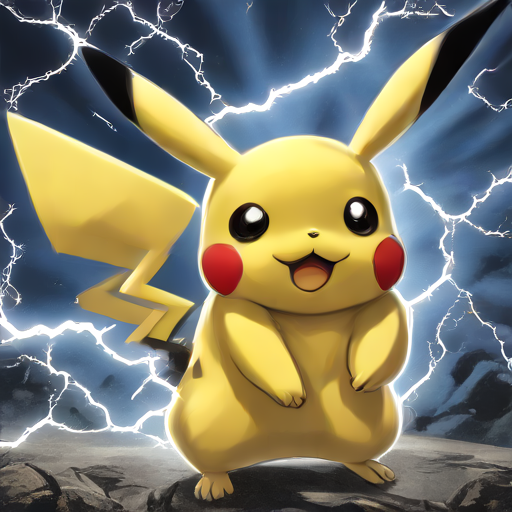

Electrically charged, Pikachu's heart beats fast
   A furry friend, with lightning in his past
   His yellow coat, a symbol bright
   His tail a bolt, a sight so right

   Black stripes adorn his tiny frame
   A face so cute, it's hard not to proclaim
   His big round ears, a listening delight
   His electric charge, a force so bright

   Pikachu's world, an anime dream
   A digital illustration, so it seems
   Shigeru Miyamoto's and Ken Sugimori's inspiration
   A close-up shot, in frontal vision

   The golden ratio, a resolution so grand
   Highly detailed, every strand
   HDR lighting, vivid colors so bright
   Polarizing filter, a sight so right

   Nostalgic lighting, a touch so sweet
   Quantum wavetracing, a scene so neat
   Octane render, a masterpiece so fine
   Pikachu's electric charge, a sight so divine

   A Pokemon franchise, an anime delight
   A digital




In [39]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about Pikachu with a picture."


response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[{"role": "user", "content": prompt}],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(response.messages[1]["content"])

## Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/completions/create)


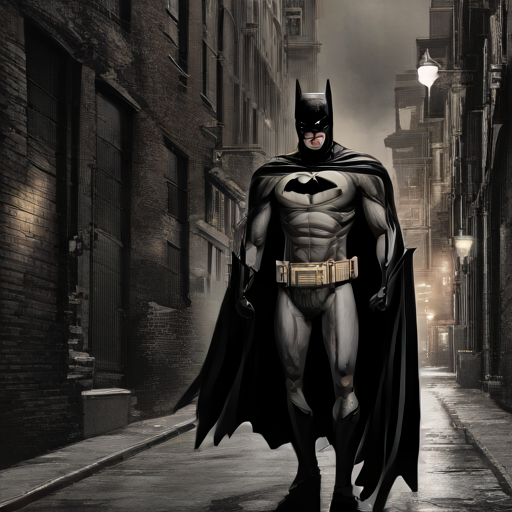

In the shadows of Gotham's night,
   A figure emerges from the gloom,
   His cape billows in the moon's light,
   Batman, protector of the doomed.

   The Bat-Signal beckons from afar,
   A call for help that he cannot ignore,
   He leaps into action, swift and far,
   The Caped Crusader, forevermore.

   Tim Sale's artistry guides his form,
   A dark and moody style he'll wear,
   His suit's texture, like a second skin,
   A symbol of his stealth and flair.

   In this alleyway, he'll make his stand,
   Against the darkness that he'll tame,
   Batman, defender of Gotham's land,
   A hero in a world gone insane.

   [Image: Batman in a Gotham City alleyway, with a dark and moody style inspired by Tim Sale's artwork. He wears his classic black suit and cowl, with his cape flowing in the wind. The Bat-Signal




In [40]:
# Modify this prompt to generate different outputs
prompt = "Write a short poem about batman with an accompanying image."

completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=prompt,
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(completion.choices[0].text)

## Cloning Text to Speech

Any `wav` file in the `voices` directory can be used as a voice.


In [41]:
prompt = "Write a short poem about Taco Bell's Doritos Locos Tacos."
response = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/generation",
    headers=HEADERS,
    json={
        "text": prompt,
        "voice": "DukeNukem",
        "language": "en",
    },
)
audio_response = response.json()
display_content(audio_response["data"])

UklGRkYOAwBXQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAATElTVBoAAABJTkZPSVNGVA4AAABMYXZmNTguNzYuMTAwAGRhdGEADgMA/P/1////CQAKABAAEwAZABsAHwAjACQAJAAnACYALAAsADEANgA4ADgAOgA+AD4AOwA7ADoAOAA4ADkANgA2ADYANAA1ADcAOQA3ADcANgA4ADQAMwA2ADQANQA0ADMAMQAzADMAMQAwAC0ALwAtACwAKwAtACkAJwApACcAJwAkACUAIAAhACAAJAAiACEAIwAgACEAIQAiABcAGgAhACEAIAAZAB0AGQAeAB0AHwAeABwAHQAeACAAHwAbAB4AHQAdACAAHgAcAB4AHgAbABkAHAAfAB8AIwAgACAAIwAhABwAHQAbAB0AHgAbAB0AGAAdACEAHgAaABoAIAAYABcAGAAYABoAGgAUABMAFAAXABQAEwAWABAAFAAYABsAHQAXABQAEwAWAB0AHQAfABkAGwAcABQAGQAeABUAIAAgABoAFwAgAB0AHAAgAB4AHQAfABwAGAAVAB0AHwAcABkAHQAlABsAHQAdABcAHAAdABwAGQAYABsAHwAbABgAHQAYABgAHgAgAB0AHAAeAB8AHgAaABkAGQAXABkAHgAdABsAGAAcABcAGAASABMAFgAVABIACwASAAgADAAOABEAEwAMAAoAEQAUABQAFAAUABAACAAKAA8ACwAFAAUAAQAEAAUACQAHAAQAAQAFAAIAAwAFAAcABQAHAAsACQANAAgACQAEAAYABQAGAAgABgAJAAsAEQAYABQADgAQAAcA+f/9/wAA+v8HAAUABQACAAwAEgALAAcABAAFAAsACAAFAAEA/v////r/8P/z/+//7//v//v/+P/5//P/9/////z/+v/2//n//P/8//n//P/z//f/8P/w//H/7//t/+b/3//f/+H/3v/n/+3/7v/x/+7/7v/q/+n/6v/l/9//

## Text to Speech


In [42]:
# We will use the audio response from the previous cell to transcribe it.
transcription = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/transcriptions",
    json={
        "file": audio_response["data"],
        "audio_format": "wav",
        "model": "base",
    },
    headers=HEADERS,
)


print(transcription.json())

{'data': " Write a short poem about Taco Bell's Doritos Locos Tacos torture."}


## Voice Completion Example


In [43]:
# We will use the audio response from a couple of cells back.
completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=audio_response["data"],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={
        "system_message": SYSTEM_MESSAGE,
        "audio_format": "wav",
        "voice": "DukeNukem",
    },
)

response_text = completion.choices[0].text
display_content(response_text)

URL: http://localhost:8091/outputs/69cf3f7bed75449a84a9edbfe88d282a.wav


Crunchy shells, spicy flavor,
   Torture in every bite,
   Doritos Locos Tacos, oh how they lure,
   But leave us yearning for just one more bite.

   Taco Bell's temptation, we can't resist,
   Our taste buds dance with every chew,
   But the craving never seems to quit,
   Leaving us in a state of torturous hue.

   The Doritos Locos Tacos, they taunt us so,
   With their crispy shells and fiery fillings,
   We're trapped in their web, unable to let go,
   In this Taco Bell torture, our souls begin chilling.

   So we'll keep coming back for more,
   Our hearts beating faster with each bite,
   For the Doritos Locos Tacos, they're our guilty pleasure,
   A torturous delight that's oh so right.

